In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples = 1000, n_features=2, centers=3)

### Applying Preprocessing to the data to make it zero mean, unit variance

In [4]:
df = pd.DataFrame({'X':X[:,0], 'Y':X[:,1]})

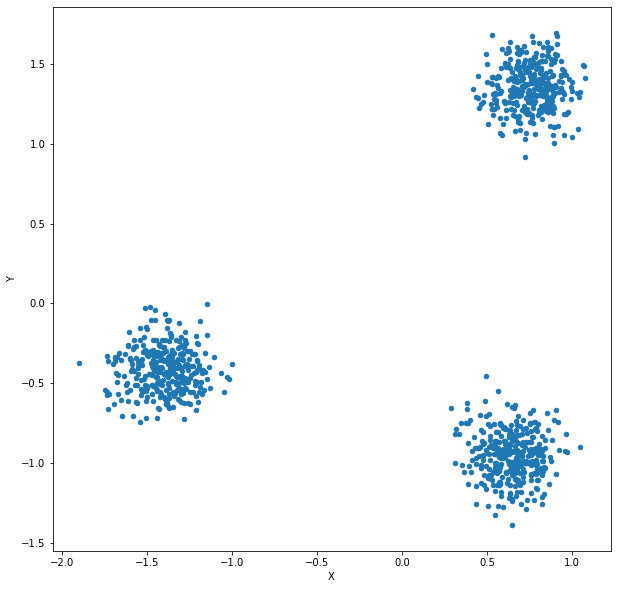

In [5]:
from sklearn.preprocessing import StandardScaler

df = df.dropna()

cols = list(df.columns)

for column in cols:
    df[column] = StandardScaler().fit_transform(df[[column]])

df.plot.scatter(x=cols[0], y=cols[1], figsize=(10,10))

 ### 2. Calculate the LOF score for each point  
      Assuming points having an LOF score greater than 1.5 to be outliers and mapping them in orange color

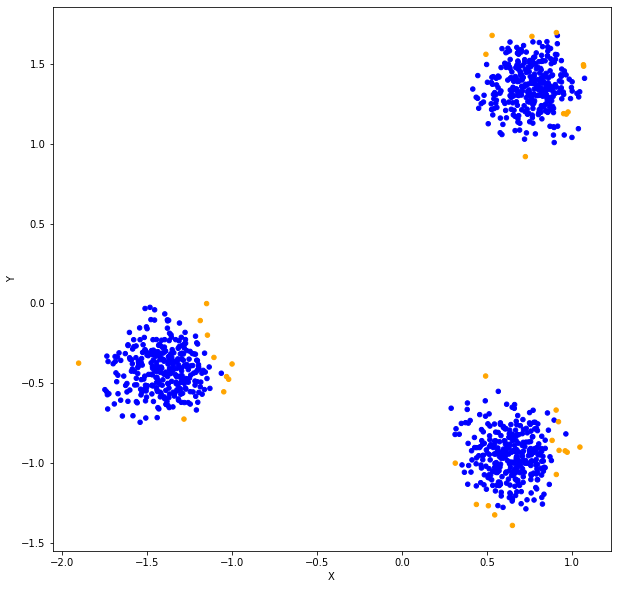

In [6]:
from sklearn.neighbors import LocalOutlierFactor

loc = LocalOutlierFactor(n_neighbors=10)
loc.fit(df)

df['LOF Score'] = loc.negative_outlier_factor_*(-1)
df['Outlier'] = loc.fit_predict(df)

df['color'] = df['LOF Score'].map(lambda x: 'orange' if x>=1.5 else 'blue')
ax1 = df.plot.scatter(x=cols[0], y=cols[1], c=df['color'],figsize=(10,10))